# Group Comparisons

This data records measurements of 1,034 professional baseball players, including their height, weight, and age at the time of measurement.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

mlb = pd.read_csv('mlb.csv')
mlb.head()
# mlb.shape  - (1034,6)

,name,team,position,height,weight,age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


## Summary Statistics

In [15]:
mlb.describe()

,height,weight,age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


## Boxplot - Heights

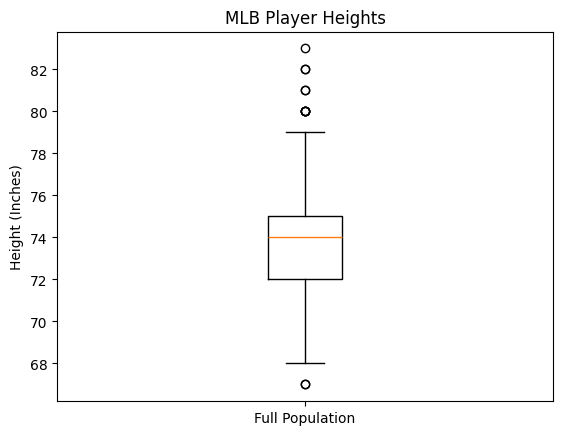

In [16]:
fig1, ax1 = plt.subplots()
ax1.boxplot(mlb['height'])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1], ['Full Population'])
plt.show()

Here, we can see that the minimum value of height in the data is around 67, and the maximum is around 83. The median (the horizontal line in the middle of the box) is around 74 inches. We can see that Matplotlib regards several of the points as outliers, and that’s why they’re drawn as circles beyond the range of the vertical lines extending from the top and bottom of the box.

## Random Samples

The best way to collect a sample that resembles the full population is to take a random sample. By selecting randomly from a full population, you expect to have equal likelihood of selecting eachdifferent type of person.

In [17]:
sample1 = mlb.sample(n=30, random_state=8675309)
sample2 = mlb.sample(n=30, random_state=1729)
print(sample1)

                  name team          position  height  weight    age
622   Brandon_Phillips  CIN    Second_Baseman      71   185.0  25.67
682       Manny_Corpas  COL    Relief_Pitcher      75   170.0  24.24
561         Tony_Clark  ARZ     First_Baseman      79   245.0  34.71
687     Jeremy_Affeldt  COL    Relief_Pitcher      76   215.0  27.73
75      Howie_Kendrick  ANA     First_Baseman      70   180.0  23.64
379        David_Riske   KC    Relief_Pitcher      74   190.0  30.35
473        Boof_Bonser  MIN  Starting_Pitcher      76   260.0  25.38
568     Carlos_Quentin  ARZ        Outfielder      73   225.0  24.51
8          Aubrey_Huff  BAL     Third_Baseman      76   231.0  30.19
444         Jean_Machi  TOR    Relief_Pitcher      72   160.0  24.08
172        Matt_Miller  CLE    Relief_Pitcher      75   215.0  35.27
627     Jeff_Keppinger  CIN     Third_Baseman      72   180.0  26.86
871      Paul_McAnulty   SD        Outfielder      70   220.0  26.01
911      Austin_Kearns  WAS       

In [18]:
sample3=[71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75, 76, 76, 75, 75, 81,77, 75, 77, 75, 77, 77, 75, 75]
print(sample3)

[71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75, 76, 76, 75, 75, 81, 77, 75, 77, 75, 77, 77, 75, 75]


Let’s look at a plot of these samples to see whether they resemble each other
and the full populatio

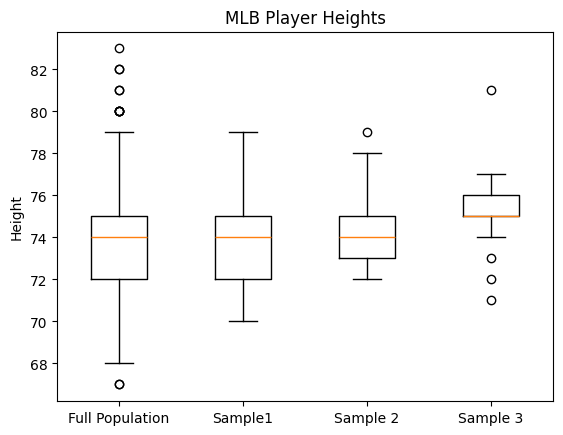

In [19]:
import numpy as np

fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height'], sample1['height'], sample2['height'], np.array(sample3)])
ax1.set_ylabel('Height')
plt.title("MLB Player Heights")
plt.xticks([1,2,3,4], ['Full Population', 'Sample1', 'Sample 2', 'Sample 3'])
plt.show()

We plot four datasets: the distribution of heights of the full
population and the distribution of heights of all three samples separately

The similarity in the first three box plots should match your intuition: when we take large enough random samples from a population, the samples should resemble the population and should resemble one another. We can also check simple summary statistics related to each sample, like the mean:


In [20]:
print(np.mean(mlb['height'])) # expected value
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))

73.6972920696325
73.8
74.36666666666666
75.43333333333334


## Differences Between Sample Data

differences between:

sample1 and sample2 = 0.6 inches
sample1 and sample3 = 1.6 inches

Do we believe sample3 is a random sample from the same population as sample1 and sample2?

We need a method more reliable than intuition to say, for example, that a difference of 0.6 inches between sample means is plausible or probable, while a difference of 1.6 inches between sample means makes it implausible that the samples come from the same population

How big of a difference between sample means would make it implausible that two samples come from the same population?

To answer this question, we need to understand the size differences we should
expect between random samples from our population. So far, we’ve looked at
only two random samples from our population. Instead of trying to generalize
based on only two samples, let’s look at a large collection of samples and see
how much they tend to differ from one another. This will help us understand
which variations are plausible and which variations are implausible.

In [21]:
# code to get a collection of 2,000 sample means and their differences:

alldifferences = []

for i in range(1000):
  newsample1 = mlb.sample(n=30, random_state=i*2)
  newsample2 = mlb.sample(n=30, random_state=i*2+1)

  alldifferences.append(newsample1['height'].mean() - newsample2['height'].mean())

print(alldifferences[0:10])

[0.8333333333333286, -0.30000000000001137, -0.10000000000000853, -0.1666666666666572, 0.06666666666667709, -0.9666666666666686, 0.7999999999999972, 0.9333333333333371, -0.5333333333333314, -0.20000000000000284]


You can see that the first two samples we checked have means that are about
0.83 inches apart. The second pair of samples has means that are about 0.3
inches apart. The sixth pair of samples has means that are almost a full inch apart
from each other (about –0.97 inches), while the fifth pair of samples has means
that are nearly identical, only about 0.07 inches apart.

Looking at these 10 numbers, we can see that 0.6 is not an implausible difference between two samples from our population, since several of our first 10 differences are greater in magnitude than 0.6. However, none of the differences we’ve seen so far are greater than 1 inch in magnitude, so 1.6 inches is starting to seem more implausible.

We can see a fuller representation of our 1,000 differences by drawing a plot
of the all differences list:

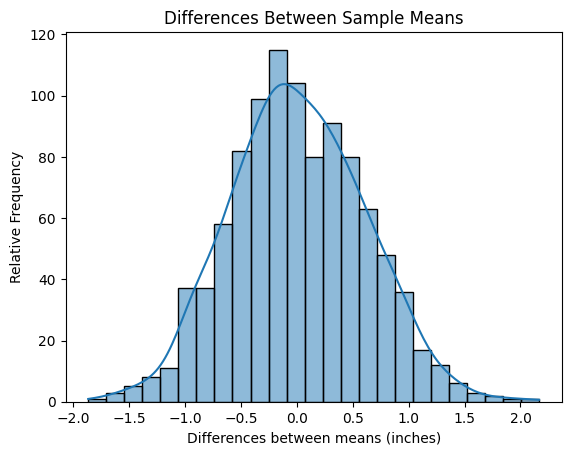

In [22]:
import seaborn as sns

ax = sns.histplot(alldifferences, kde=True)

ax.set_title('Differences Between Sample Means')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Differences between means (inches)')
plt.show()

One powerful theoretical result in statistics is called the central limit theorem, and it states that under a certain set of common conditions, differences between means of samples will be distributed in a shape
that’s approximately a bell curve. The technical conditions that make this
theorem true are that the random samples are independent and identically
distributed (that is, random draws from the same population) and that the
population has a finite expected value and a finite variance. The fact that we see approximate bell curves in so many domains provides evidence that these
technical conditions are often met.

Given what we know so far, do we believe that sample3 is a random sample from our population of baseball players? We saw that the difference between the mean of sample3 and the mean of sample1 is about 1.6 inches. When we look at Figure 3-3, we can see that the bell curve is extremely low there, close to 0. This means that random samples from our population only rarely differ by as much as 1.6 inches. This makes it seem relatively implausible that sample3 is a random sample from our baseball player population. We can find out how implausible it is by checking exactly how many of our differences have magnitude greater than or equal to 1.6 inches:


In [23]:
largedifferences = [diff for diff in alldifferences if abs(diff) >= 1.6]
print(len(largedifferences))

8


p-value = 8/1000 = 0.8 percent (probability that the mean heights of two random samples from the mlb population differ by 1.6 inches or more)

We find that the list has only eight elements, meaning random samples from our mlb population have means that differ by 1.6 or more only about 8 in 1,000 times, or 0.8 percent of the time. This value, 0.8 percent or 0.008, is a calculated likelihood. We can think of it as our best estimate of the probability that the mean heights of two random samples from the mlb population differ by 1.6 inches or more. This probability is often called a p-value, where p is short for probability.

The low p-value causes us to reject the
notion that these two groups come from the same population. The lower the pvalue, the more confident we feel about rejecting the notion that the groups come
from the same population, because low p-values require us to believe in more
and more unlikely coincidences. By contrast, consider how common it is that
differences between sample means from our population are 0.6 inches or more

In [24]:
smalldifferences = [diff for diff in alldifferences if abs(diff) >= 0.6]
print(len(smalldifferences)) # number of differences between sample means that have a difference greater than 0.6 inches

314


So a difference of this magnitude occur 31.4 percent of the time (314/1000)
p-value is 0.314

If sample1 and sample2 come
from the same population, we would have to believe that this size of difference,
which occurs about 31 percent of the time, occurred in our case. It’s not hard to
believe that something with 31 percent probability occurred, so we conclude that
the difference between sample1 and sample2 is plausible; we’re willing to accept
that, though not identical, they’re random samples from the same population.

## Performing Hypothesis Testing

- Hypothesis 0 (null hypothesis) - sample1 and sample3 are random samples from the same
population.
- Hypothesis 1 (alternative hypothesis) - sample1 and sample3 are not random samples from the same
population.


Assume that Hypothesis 0, the null hypothesis, is true.
Find how likely we are to observe sample means that differ by as much as our
observed sample means, assuming that Hypothesis 0 is true. The likelihood of
this occurring is called the p-value.
If the p-value is small enough, we reject Hypothesis 0, and we’re therefore
willing to accept Hypothesis 1.

We can choose whatever level of smallness we think is appropriate to
justify rejecting Hypothesis 0, based on our own judgment and intuitions. The p- value size that we believe justifies rejecting Hypothesis 0 is called the
*significance level*.

The most common significance level used in empirical research is 5 percent,
meaning that we consider the rejection of the null hypothesis justified if p <
0.05. In the case of sample1 and sample3, we can justify rejecting Hypothesis 0
at a significance level as low as 1 percent, because we found p < 0.01. When we
find a p-value that’s less than our chosen significance level, we say that the
difference between our groups is statistically significant.

The recommended practice is to choose the significance level that we want to use before we do any calculations; that way, we avoid the temptation to choose a significance level that confirms whichever hypothesis we want to be confirmed.


## The t-Test

We don’t have to go through the whole process of calculating means, creating a
histogram, and manually calculating p-values every time we want to do
hypothesis testing. Statisticians have discovered succinct equations that define
how likely two groups are to come from the same population. They’ve created a
relatively simple test called a t-test that does the process of hypothesis testing quickly and painlessly, without requiring a for loop or a histogram.

In [25]:
import scipy.stats
scipy.stats.ttest_ind(sample1['height'], sample2['height'])

TtestResult(statistic=-1.0839563860213952, pvalue=0.2828695892305152, df=58.0)

It differs a little from the 0.314 p-value we calculated earlier because that p-value calculation method was an approximate method, and this one is more mathematically exact.

## Mann-Whitney U test (or Wilcoxon rank-sum test)

In some cases, we’d prefer to perform hypothesis testing with a test that didn’t
make these strong assumptions that may not be true. If so, we can rely on a body
of knowledge called nonparametric statistics, which provides tools for
hypothesis testing and other statistical reasoning that make fewer assumptions
about the distribution of our data (for example, we don’t need to work with
populations whose sample means follow bell curves). One hypothesis test from
nonparametric statistics is called the Mann-Whitney U test (or the Wilcoxon
rank-sum test), and we can implement it easily in Python as follows:

In [26]:
scipy.stats.mannwhitneyu(sample1['height'], sample2['height'])


MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)

## Nuances of Hypothesis Testing



One important point to remember is what a p-value tells you: it tells you the
likelihood of observing data, after assuming a null hypothesis to be true. People often think or wish it told them the converse: the likelihood of a hypothesis’s truth, given some observed data. Always remember that a p-value should not be interpreted directly as a probability of a hypothesis being true. So, when we see that the p-value for comparing the heights of sample1 and sample3 is p = 0.008, we can’t say, “These samples have only a 0.8 percent probability of coming from the same population,” nor can we say, “The null hypothesis has a 0.8 percent probability of being true.” We can say only, “If the null hypothesis is true, something with 0.8 percent probability occurred.” This enables us to decide whether to reject the null hypothesis, but it doesn’t enable us to say exactly how likely either hypothesis is to be true.


Another important nuance is the difference between accepting a hypothesis
and failing to reject it. Hypothesis testing has only two possible outcomes: either we reject a null hypothesis, or we decide not to reject the null hypothesis. Failing to reject something is not quite the same as wholeheartedly accepting it, and just because a p-value is not below a significance threshold does not mean that two groups are certainly the same. Just because one t-test fails to lead to a rejection of the null hypothesis does not mean that the null hypothesis is certainly true.

Similarly, just because one p-value seems to justify a rejection of a null
hypothesis does not mean that the null hypothesis is certainly false. This is
especially true when we have limited data; difficult, noisy measurements; or a
reason to doubt our measurements. Hypothesis testing does not let us take
uncertain data and have perfect certainty about hypotheses. Rather, it provides
one piece of evidence that we have to understand properly and then weigh
together with a great deal of other evidence.


Statistics has an analogous principle: all
acceptances of the null hypothesis are alike, but each rejection of the null
hypothesis happens for a different reason. The null hypothesis states that two
samples are random draws from the same population. If we reject the null
hypothesis, any one or more of a number of things could be true: our two
samples could be random draws from different populations, or both could be
samples from the same population but not randomly selected, or a source of
sampling bias could be present, or blind luck might be occurring. Just because
we are confident about rejecting the null hypothesis doesn’t mean we can be
confident about which part of the null hypothesis is incorrect.

A final nuance to remember is the difference between statistical significance
and practical significance. It’s possible for one sample of athletes to have mean
height 73.11 and another sample of athletes to have mean height 73.12, and for
these two means to have a statistically significant difference according to a t-test.
We can justifiably conclude that these two groups are not random samples from
the same population and treat them differently because of their different mean
height. However, even if this difference of 0.01 inches is statistically significant,
it’s not clear that this difference has practical significance. Members of these two
groups should be able to wear the same clothes, sit on the same seats on
airplanes, and reach the same high cupboards (on average). We have no reason to
suppose that one group would be better than the other group at baseball in any
practically important sense. In this case, we might wish to ignore the results of a
t-test, since even though a statistically detectable difference exists, it’s not a
difference that has any practical consequence. Practical significance is always an
important thing to consider during the process of hypothesis testing.
Now that we’ve discussed hypothesis testing and its thorny theoretical
nuances, let’s turn to a practical business example.
